## Objctive:

- Will take bank marketing data set

- Will apply Model developemnt

- Logistic regression

- Decision tree

- Navi bayes

- KNN

- Evaluation techniques

- Hyperparameter tuning

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data=pd.read_csv('/Users/sheelendersharma1/Desktop/data sciece/bank.csv',sep=';')

In [91]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [92]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

*step -3:*

- you need to perform EDA
- you need to understand about features
- you need to perform feature selection

*step-4:*
    

# convert categorical column to numerical data

- Mapping technique
- get dummies
- lables encoder

In [93]:
# will seperate categorical columns

#for key in dict(data.dtypes):
#    if dict(data.dtypes)[key] in ['object']
 #   print(key)
    

    
cat=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]

In [94]:
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

$Label Encoder$

In [95]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in cat:
    data[i]=l.fit_transform(data[i])
    
   # data['job']=l.fit_transform(data['job'])

In [96]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


$Step-5$

*Divide data into input and output*


In [97]:
# in our data output column is 'y'
# will drop that column so that we have input data
# will select only 'y' column so that we have output data

X=data.drop('y',axis=1)
y=data['y']

In [98]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3


In [99]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

- Divide data into input(X) and output(y)

- Divide input data into two parts train input data(X_train) and test input data(X_test)

- Divide output data into two parts train output data(y_train) and test output data(y_test)

- Model will develop using train input data(X_train) and train output data(y_train)

- Pass test input data(X_test) to the model

- Then model will give y_predicted data

- Now compare y_predictions with test output data(y_test)

$step-6$
**Apply train test split**

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)

In [101]:
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((3164, 16), (1357, 16), (1357,), (3164,))

In [102]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
679,44,3,1,0,0,3706,0,0,2,17,6,209,3,-1,0,3
3214,41,1,1,0,0,-204,1,1,2,6,6,42,1,-1,0,3
1925,33,7,1,1,0,0,1,0,1,22,5,44,8,-1,0,3
234,30,8,2,1,0,3096,0,0,0,26,4,123,1,-1,0,3
2807,60,0,1,3,0,1088,1,0,0,26,8,149,1,-1,0,3


In [103]:
data.shape

(4521, 17)

In [104]:
y_train.head()

679     0
3214    0
1925    0
234     0
2807    0
Name: y, dtype: int64

# case-1:with out standardization of data



## with out Hyperpramater tuning

$step-7$:
    
**Model Development**

### 1.Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()
tree_model

DecisionTreeClassifier()

In [106]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [107]:
tree_model.fit(X=X_train,y=y_train)

DecisionTreeClassifier()

$Step-8$
**Prediction**

In [108]:
y_dt_pred=tree_model.predict(X_test)
y_dt_pred

array([0, 0, 0, ..., 0, 0, 0])

In [109]:
print(y_test.values[:20])
print(y_dt_pred[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


$step-9$

**Evalaition**

In [110]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.metrics import confusion_matrix

In [111]:
# Accuracy_score

dt_acc=accuracy_score(y_test,y_dt_pred)
dt_acc=round(dt_acc,2)*100
print("Accuracy using DT:",dt_acc)

Accuracy using DT: 86.0


In [112]:
# confusion matrix:

dt_cnf=confusion_matrix(y_test,y_dt_pred)
dt_cnf


array([[1104,   95],
       [  98,   60]])

<img src="https://miro.medium.com/v2/resize:fit:712/1*Z54JgbS4DUwWSknhDCvNTQ.png" jsaction="load:XAeZkd;" jsname="HiaYvf" class="n3VNCb pT0Scc KAlRDb" alt="Understanding Confusion Matrix | by Sarang Narkhede | Towards Data Science" data-noaft="1" style="width: 353.333px; height: 265px; margin: 0px;">

In [113]:
tn,fp,fn,tp=confusion_matrix(y_test,y_dt_pred).ravel()
print("TN:",tn)
print("TP:",tp)
print("FP:",fp)
print("FN:",fn)

TN: 1104
TP: 60
FP: 95
FN: 98


<AxesSubplot:>

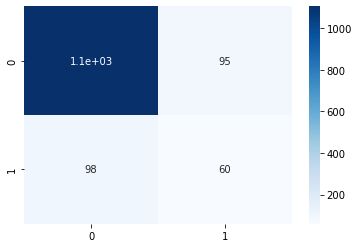

In [114]:
sns.heatmap(dt_cnf,annot=True,cmap='Blues')

<AxesSubplot:>

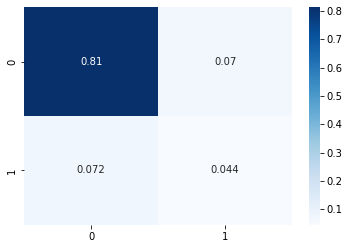

In [115]:
sns.heatmap(dt_cnf/np.sum(dt_cnf),
            annot=True,
            cmap='Blues')

$Precision$

In [116]:
# Precision = tp/(tp+fp)
pr=tp/(tp+fp)
pr

0.3870967741935484

In [117]:
dt_pr=precision_score(y_test,y_dt_pred)
dt_pr

0.3870967741935484

$Recall$

In [118]:
# Recall
recall=tp/(tp+fn)
recall

0.379746835443038

In [119]:
dt_recall=recall_score(y_test,y_dt_pred)
dt_recall

0.379746835443038

$F1 score$

In [120]:
# F1 score
#F1 = 2 * (precision * recall) / (precision + recall)
f1=2*(pr*recall)/(pr+recall)
f1



0.38338658146964855

In [121]:
dt_F1_score=f1_score(y_test,y_dt_pred)
dt_F1_score

0.38338658146964855

In [122]:
dict1={"DT_accuracy":round(dt_acc,2),
      "DT_precision":round(dt_pr,2),
      "DT_recall":round(dt_recall,2),
      "Dt_F1_score":round(dt_F1_score,2)}
pd.DataFrame(dict1,index=['Decision Tree'])

,DT_accuracy,DT_precision,DT_recall,Dt_F1_score
Decision Tree,86.0,0.39,0.38,0.38


$classification$

In [123]:
print(classification_report(y_test,y_dt_pred))
# Support:number of actual occurences
# total observation in test data is 1357
# in that number of 0's as target is 1199
# in that number of 1's target is 158

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1199
           1       0.39      0.38      0.38       158

    accuracy                           0.86      1357
   macro avg       0.65      0.65      0.65      1357
weighted avg       0.86      0.86      0.86      1357



# Your task is 

what is ment by marco avg and weighted avg

 # ROC AUC

- There are two claases are there
- for every observation it will give probablities
- Which ever is the higest probability that class will be the output


In [124]:
probs=tree_model.predict_proba(X_test)

In [125]:
prob_data=pd.DataFrame(probs,columns=['class_0','class_1'])
prob_data.head(10)

,class_0,class_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,0.0,1.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


In [126]:
print(y_dt_pred[:20])  #these are classes
print(y_test.values[:20]) 

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


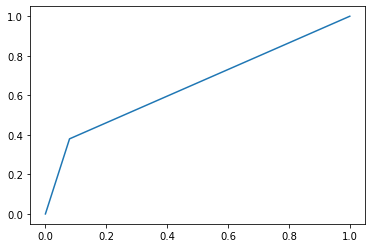

In [127]:
# X-axis=FPR=1-TNR=FP/N
# Y-axis=TPR=TP/P

from sklearn.metrics import roc_curve

y_dt_pred_prob=tree_model.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob)
plt.plot(fpr,tpr)


In [128]:
# AT one place

from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()
tree_model

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, roc_score
from sklearn.metrics import confusion_matrix

dt_acc=accuracy_score(y_test,y_dt_pred)
dt_pr=precision_score(y_test,y_dt_pred)
dt_recall=recall_score(y_test,y_dt_pred)
dt_f1_score=f1_score(y_test,y_dt_pred)

dict1={"DT_accuracy":round(dt_acc,2),
      "DT_precision":round(dt_pr,2),
      "DT_recall":round(dt_recall,2),
      "Dt_F1_score":round(dt_F1_score,2)}
pd.DataFrame(dict1,index=['Decision Tree'])

ImportError: cannot import name 'roc_score' from 'sklearn.metrics' (/Users/sheelendersharma1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/__init__.py)

# 2.NaviBayes

In [129]:
from sklearn.naive_bayes import GaussianNB
Navie=GaussianNB()


In [130]:
Navie=Navie.fit(X=X_train,y=y_train)
Navie


GaussianNB()

In [131]:
y_nb_pred=Navie.predict(X_test)

In [132]:
nb_acc=accuracy_score(y_test,y_nb_pred)
nb_pr=precision_score(y_test,y_nb_pred)
nb_recall=recall_score(y_test,y_nb_pred)
nb_f1_score=f1_score(y_test,y_nb_pred)

dict1={"NB_accuracy":round(dt_acc,2),
      "NB_precision":round(dt_pr,2),
      "NB_recall":round(dt_recall,2),
      "NB_F1_score":round(dt_F1_score,2)}
pd.DataFrame(dict1,index=['Naive_Bayes'])



,NB_accuracy,NB_precision,NB_recall,NB_F1_score
Naive_Bayes,86.0,0.39,0.38,0.38


In [133]:
dt_list=[dt_acc,dt_pr,dt_recall,dt_F1_score]
nb_list=[nb_acc,nb_pr,nb_recall,nb_f1_score]
pd.DataFrame(zip(dt_list,nb_list),
             columns=['Decision_Tree','Naive_Bayes'],
             index=['Accuracy','Precison','Recall','F1score'])



,Decision_Tree,Naive_Bayes
Accuracy,86.000000,0.811349
Precison,0.387097,0.275229
Recall,0.379747,0.379747
F1score,0.383387,0.319149


# 3.Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
Logist=LogisticRegression()
Logist

LogisticRegression()

In [135]:
Logist=Logist.fit(X_train,y_train)

/Users/sheelendersharma1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [136]:
y_Logist_pred=Logist.predict(X_test)

In [137]:
Logist_acc=accuracy_score(y_test,y_Logist_pred)
Logist_pr=precision_score(y_test,y_Logist_pred)
Logist_recall=recall_score(y_test,y_Logist_pred)
Logist_f1_score=f1_score(y_test,y_Logist_pred)

dict1={"Logist_accuracy":round(Logist_acc,2),
      "Logist_precision":round(Logist_pr,2),
      "Logist_recall":round(Logist_recall,2),
      "Logist_F1_score":round(Logist_f1_score,2)}
pd.DataFrame(dict1,index=['Naive_Bayes'])

,Logist_accuracy,Logist_precision,Logist_recall,Logist_F1_score
Naive_Bayes,0.88,0.5,0.14,0.22


# 4.KNN

In [138]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn

KNeighborsClassifier()

In [139]:
knn=knn.fit(X_train,y_train)

In [140]:
y_knn_pred=knn.predict(X_test)

In [141]:
knn_acc=accuracy_score(y_test,y_knn_pred)
knn_pr=precision_score(y_test,y_knn_pred)
knn_recall=recall_score(y_test,y_knn_pred)
knn_f1_score=f1_score(y_test,y_knn_pred)

dict1={"KNN_accuracy":round(knn_acc,2),
      "KNN_precision":round(knn_pr,2),
      "KNN_recall":round(knn_recall,2),
      "KNN_F1_score":round(knn_f1_score,2)}
pd.DataFrame(dict1,index=['KNN'])

,KNN_accuracy,KNN_precision,KNN_recall,KNN_F1_score
KNN,0.88,0.42,0.19,0.26


# 5.Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF

RandomForestClassifier()

In [143]:
RF=RF.fit(X_train,y_train)

In [144]:
y_RF_pred=RF.predict(X_test)

In [145]:
RF_acc=accuracy_score(y_test,y_RF_pred)
RF_pr=precision_score(y_test,y_RF_pred)
RF_recall=recall_score(y_test,y_RF_pred)
RF_f1_score=f1_score(y_test,y_RF_pred)

dict1={"RF_accuracy":round(RF_acc,2),
      "RF_precision":round(RF_pr,2),
      "RF_recall":round(RF_recall,2),
      "RF_F1_score":round(RF_f1_score,2)}
pd.DataFrame(dict1,index=['RF'])

,RF_accuracy,RF_precision,RF_recall,RF_F1_score
RF,0.89,0.58,0.23,0.33


# 6. SVM 

In [146]:
from sklearn.svm import SVC
SVM=SVC()
SVM

SVC()

In [147]:
SVM=SVM.fit(X_train,y_train)

In [148]:
y_SVM_pred=SVM.predict(X_test)

In [149]:
SVM_acc=accuracy_score(y_test,y_SVM_pred)
SVM_pr=precision_score(y_test,y_SVM_pred)
SVM_recall=recall_score(y_test,y_SVM_pred)
SVM_f1_score=f1_score(y_test,y_SVM_pred)

dict1={"SVM_accuracy":round(SVM_acc,2),
      "SVM_precision":round(SVM_pr,2),
      "SVM_recall":round(SVM_recall,2),
      "SVM_F1_score":round(SVM_f1_score,2)}
pd.DataFrame(dict1,index=['SVM'])

/Users/sheelendersharma1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,SVM_accuracy,SVM_precision,SVM_recall,SVM_F1_score
SVM,0.88,0.0,0.0,0.0


In [150]:
dt_list=[dt_acc,dt_pr,dt_recall,dt_F1_score]
nb_list=[nb_acc,nb_pr,nb_recall,nb_f1_score]
Logist_list=[Logist_acc,Logist_pr,Logist_recall,Logist_f1_score]
knn_list=[knn_acc,knn_pr,knn_recall,knn_f1_score]
RF_list=[RF_acc,RF_pr,RF_recall,RF_f1_score]
SVM_list=[SVM_acc,SVM_pr,SVM_recall,SVM_f1_score]



pd.DataFrame(zip(dt_list,nb_list,Logist_list,knn_list,RF_list,SVM_list),
             columns=['Decision_Tree','Naive_Bayes','Logist','knn','RF','SVM'],
             index=['Accuracy','Precison','Recall','F1score'])

,Decision_Tree,Naive_Bayes,Logist,knn,RF,SVM
Accuracy,86.000000,0.811349,0.883567,0.875461,0.890936,0.883567
Precison,0.387097,0.275229,0.500000,0.422535,0.578125,0.000000
Recall,0.379747,0.379747,0.139241,0.189873,0.234177,0.000000
F1score,0.383387,0.319149,0.217822,0.262009,0.333333,0.000000


## Case-2:

*Standardisation of data*

<img src="https://www.thedataschool.co.uk/content/images/2021/06/z-formula.png" jsaction="load:XAeZkd;" jsname="HiaYvf" class="n3VNCb pT0Scc KAlRDb" role="" aria-label="" alt="The Data School - Data Prep and Analysis Series -Standardize vs Normalize  Data Part 1" data-noaft="1" style="width: 346px; height: 109px; margin: 15.55px 0px;">

In [151]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_sd=s.fit_transform(X)

In [152]:
X_sd=pd.DataFrame(X_sd,columns=X.columns)

In [153]:
X_sd

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-1.056270,1.716804,-0.246429,-1.644755,-0.130759,0.121072,-1.142051,-0.424756,-0.723642,0.374052,1.485414,-0.711861,-0.576829,-0.407218,-0.320413,0.444413
1,-0.772583,0.795246,-0.246429,-0.309038,-0.130759,1.118644,0.875617,2.354292,-0.723642,-0.596026,0.819288,-0.169194,-0.576829,2.989044,2.041734,-2.579961
2,-0.583458,-0.126313,1.421396,1.026680,-0.130759,-0.024144,0.875617,-0.424756,-0.723642,0.010273,-1.845220,-0.303898,-0.576829,2.899143,0.270124,-2.579961
3,-1.056270,-0.126313,-0.246429,1.026680,-0.130759,0.017726,0.875617,2.354292,1.495133,-1.566105,0.153161,-0.250017,0.387967,-0.407218,-0.320413,0.444413
4,1.686036,-1.047871,-0.246429,-0.309038,-0.130759,-0.472753,0.875617,-0.424756,1.495133,-1.323585,0.819288,-0.146102,-0.576829,-0.407218,-0.320413,0.444413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772583,0.795246,-0.246429,-0.309038,-0.130759,-0.583410,0.875617,-0.424756,-0.723642,1.707910,-0.179903,0.250315,0.709566,-0.407218,-0.320413,0.444413
4517,1.496912,0.488060,-0.246429,1.026680,7.647669,-1.573671,0.875617,2.354292,1.495133,-0.838546,0.819288,-0.427057,-0.576829,-0.407218,-0.320413,0.444413
4518,1.496912,1.409618,-0.246429,-0.309038,-0.130759,-0.374724,-1.142051,-0.424756,-0.723642,0.374052,-1.512157,-0.434754,2.639160,-0.407218,-0.320413,0.444413
4519,-1.245394,-1.047871,-0.246429,-0.309038,-0.130759,-0.094925,-1.142051,-0.424756,-0.723642,-1.202326,-0.846030,-0.519426,0.387967,1.710451,1.451197,-1.571836


In [154]:
# Divide data into train test split

from sklearn.model_selection import train_test_split
x_train_sd,x_test_sd,y_train_sd,y_test_sd=train_test_split(X_sd,y,test_size=0.3,
                                                          random_state=1234)

In [155]:
# =============== Decision Tree ================
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()
tree_model
tree_model.fit(X=x_train_sd,y=y_train_sd)
y_dt_pred=tree_model.predict(x_test_sd)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, roc_curve
from sklearn.metrics import confusion_matrix

dt_sd_acc=accuracy_score(y_test_sd,y_dt_pred)
dt_sd_pr=precision_score(y_test_sd,y_dt_pred)
dt_sd_recall=recall_score(y_test_sd,y_dt_pred)
dt_sd_f1_score=f1_score(y_test_sd,y_dt_pred)

dict1={"DT_accuracy":round(dt_sd_acc,2),
      "DT_precision":round(dt_sd_pr,2),
      "DT_recall":round(dt_sd_recall,2),
      "Dt_F1_score":round(dt_sd_f1_score,2)}
pd.DataFrame(dict1,index=['Decision Tree'])





,DT_accuracy,DT_precision,DT_recall,Dt_F1_score
Decision Tree,0.87,0.42,0.42,0.42


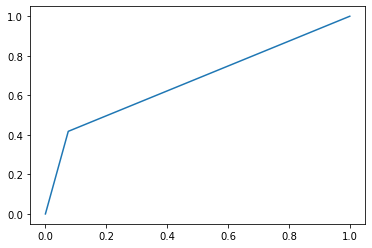

In [156]:
y_dt_pred_prob=tree_model.predict_proba(x_test_sd)[:,1]
fpr,tpr,threshold=roc_curve(y_test_sd,y_dt_pred_prob)
plt.plot(fpr,tpr)

In [157]:

# =============== KNN ================
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn
knn.fit(X=x_train_sd,y=y_train_sd)
y_knn_pred=tree_model.predict(x_test_sd)



knn_sd_acc=accuracy_score(y_test_sd,y_knn_pred)
knn_sd_pr=precision_score(y_test_sd,y_knn_pred)
knn_sd_recall=recall_score(y_test_sd,y_knn_pred)
knn_sd_f1_score=f1_score(y_test_sd,y_knn_pred)

dict1={"knn_accuracy":round(knn_sd_acc,2),
      "knn_precision":round(knn_sd_pr,2),
      "knn_recall":round(knn_sd_recall,2),
      "knn_F1_score":round(knn_sd_f1_score,2)}
pd.DataFrame(dict1,index=['KNN'])

,knn_accuracy,knn_precision,knn_recall,knn_F1_score
KNN,0.87,0.42,0.42,0.42


In [158]:
# =============== Logistic Regression ================
from sklearn.linear_model import LogisticRegression
Logist=LogisticRegression()
Logist
Logist.fit(X=x_train_sd,y=y_train_sd)
y_Logist_pred=tree_model.predict(x_test_sd)



Logist_sd_acc=accuracy_score(y_test_sd,y_Logist_pred)
Logist_sd_pr=precision_score(y_test_sd,y_Logist_pred)
Logist_sd_recall=recall_score(y_test_sd,y_Logist_pred)
Logist_sd_f1_score=f1_score(y_test_sd,y_knn_pred)

dict1={"knn_accuracy":round(knn_sd_acc,2),
      "knn_precision":round(knn_sd_pr,2),
      "knn_recall":round(knn_sd_recall,2),
      "knn_F1_score":round(knn_sd_f1_score,2)}
pd.DataFrame(dict1,index=['KNN'])

,knn_accuracy,knn_precision,knn_recall,knn_F1_score
KNN,0.87,0.42,0.42,0.42


# Hyper parameter  tuning

## Decision tree

In [159]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_tree=DecisionTreeClassifier()
grid_tree

DecisionTreeClassifier()

In [160]:
grid_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [161]:
grid_param={"criterion":['gini','entropy'],
           "max_depth":[3,4,5,6,7,8]}



In [162]:
grid_model=GridSearchCV(grid_tree,
                       param_grid=grid_param,
                       scoring='accuracy',
                       cv=5,verbose=False)

In [163]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8]},
             scoring='accuracy', verbose=False)

In [164]:
grid_model.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [165]:
grid_model.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [166]:
grid_model.best_score_

0.8906443097966286

In [167]:
cross_val_score(grid_model.best_estimator_,
               X_train,y_train,scoring='accuracy').mean()

0.890327854100426

In [168]:
# show me the KNN hyperparameters


from sklearn.model_selection import GridSearchCV,cross_val_score
grid_knn=KNeighborsClassifier()
grid_knn

KNeighborsClassifier()

In [169]:
grid_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [170]:
grid_param=grid_param={"leaf_size":[20],
                      "n_neighbors":[4]}

In [171]:
grid_model=GridSearchCV(grid_knn,
                       param_grid=grid_param,
                       scoring='accuracy',
                       cv=5,verbose=False)

In [172]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [20], 'n_neighbors': [4]},
             scoring='accuracy', verbose=False)

In [173]:
grid_model.best_estimator_

KNeighborsClassifier(leaf_size=20, n_neighbors=4)

In [174]:
grid_model.best_score_

0.8773691683164356

In [175]:
grid_model.best_index_

0

In [176]:
grid_model.best_params_

{'leaf_size': 20, 'n_neighbors': 4}

In [177]:
# Diffrent parameter
from sklearn.neighbors import KNeighborsClassifier
knn_grid=KNeighborsClassifier()
knn_grid.get_params()
knn_grid_para={"n_neighbors":[5,6,7,10],
              "leaf_size":[20,30,40,50],
              "algorithm" :['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_grid_model=GridSearchCV(knn_grid, 
                        cv=5,       
                        param_grid=knn_grid_para, 
                        scoring="accuracy", 
                       verbose=True)
knn_grid_model.fit(X_train,y_train)
print(knn_grid_model.best_estimator_)
print(knn_grid_model.best_params_)
print(knn_grid_model.best_score_)

cross_val_score(knn_grid_model.best_estimator_,
               X_train,y_train,
               scoring='accuracy')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
KNeighborsClassifier(leaf_size=20, n_neighbors=10)
{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 10}
0.8798968144459776


array([0.87993681, 0.89099526, 0.87045814, 0.88467615, 0.87341772])

# linear Regrission

In [4]:
import pandas as pd
from sklearn import linear_model

In [7]:
df=pd.read_csv('/Users/sheelendersharma1/Desktop/data sciece/priya.csv')

In [9]:
df.head()

,type of phnoe,ram,rom,rate,wt
0,5,8,128,29000,200
1,4,4,64,15000,300
2,4,4,16,12000,180
3,4,6,128,20000,250
4,5,8,256,18000,290


In [13]:
X=df[['rom','wt']]
y=df['rate']

In [14]:
regs=linear_model.LinearRegression()
regs.fit(X,y)

LinearRegression()

In [16]:
pr=regs.predict([[512,300]])
print(pr)

[35365.12797185]


/Users/sheelendersharma1/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y=b0+b1*x1

b0=constant
b1=cofficent
x1=independent varible
y=dependent varible

In [41]:
# Dcsision Tree

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt



In [51]:
df={"age":(9[23,26,22,24,25]),
      "experience":'2','3','6','5','4'),
      "rank":'6','5','7','3','1'),
      "qualified":'0','1','3','1','2'),
      "heired":'0','1','1','0','1'}
pd.DataFrame(df,index=['0','1','2','3','4'])

SyntaxError: invalid syntax (3905644280.py, line 2)

In [42]:
df=pd.read_csv('/Users/sheelendersharma1/Desktop/data sciece/decision tree.csv')
df.head()

,age,experience rank,Unnamed: 2,qualified,heired
0,23,2,6,0,0
1,26,3,5,1,1
2,22,6,7,3,1
3,24,5,3,1,0
4,23,4,1,2,1


In [45]:
feature=['age','experience rank','qualified']

In [46]:
x=df[feature]

y=df['heired']

dtree=DecisionTreeClassifier() 
dtree=dtree.fit(x, y)

tree.plot_tree(dtree, feature_names=feature)

KeyError: "None of [Index(['age', 'experience rank', 'qualified'], dtype='object')] are in the [columns]"